In [ ]:
import numpy as np
import time
import PIL.Image as Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime
from tqdm.keras import TqdmCallback
from skimage import transform
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization, Conv2D,MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
from tensorflow import keras
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/chest_xray'
train_path='/content/drive/MyDrive/chest_xray /train'
test_path='/content/drive/MyDrive/chest_xray /test'

#Numeric Constants.
batch_size=32
img_width=299
img_height=299

In [ ]:
# generators
train = keras.utils.image_dataset_from_directory(
    directory = train_path,
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(299,299)
)

test = keras.utils.image_dataset_from_directory(
    directory = test_path,
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(299,299)
)

# Inspect labels (Optional):
for images, labels in train.as_numpy_iterator():
    print(f"Unique labels found: {np.unique(labels)}") # check unique labels found
    break # Check only the first batch for label values

Found 4750 files belonging to 3 classes.
Found 1188 files belonging to 3 classes.
Unique labels found: [0 1 2]


In [ ]:
class_names=train.class_names
print(f"Our target classes are :{class_names}")

Our target classes are :['NORMAL', 'PNEUMONIA_BACTERIAL', 'PNEUMONIA_VIRAL']


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train = train.map(process)
test = test.map(process)

# **CUSTOM_CNN_MODEL**


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models

# Function to process images and make labels binary (0 or 1)
def process(image, label):
    label = tf.where(label == 2, 1, label)  # Convert label 2 → 1
    image = tf.cast(image / 255.0, tf.float32)  # Normalize image
    return image, label

# Load Train Dataset
train = keras.utils.image_dataset_from_directory(
    directory=train_path,
    labels='inferred',
    label_mode='int',  # Integer labels
    batch_size=32,
    image_size=(299, 299)
)

# Load Test Dataset
test = keras.utils.image_dataset_from_directory(
    directory=test_path,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(299, 299)
)

# Apply preprocessing (normalize images + fix labels)
train = train.map(process)
test = test.map(process)

# Verify unique labels
for images, labels in train.take(1):
    print(f"Unique labels after processing: {np.unique(labels.numpy())}")

# Model Definition
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Change output to 1 neuron with sigmoid activation
])

# Compile Model for Binary Classification
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),  # Binary Loss
    metrics=['accuracy']
)

# Train Model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

NUM_EPOCHS = 13
history = model_cnn.fit(
    train,
    validation_data=test,
    epochs=NUM_EPOCHS,
    callbacks=[early_stopping],
    verbose=1
)


Found 4750 files belonging to 3 classes.
Found 1188 files belonging to 3 classes.
Unique labels after processing: [0 1]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/13
149/149 ━━━━━━━━━━━━━━━━━━━━ 1321s 8s/step - accuracy: 0.7338 - loss: 0.6362 - val_accuracy: 0.9301 - val_loss: 0.2022
Epoch 2/13
149/149 ━━━━━━━━━━━━━━━━━━━━ 1122s 7s/step - accuracy: 0.9153 - loss: 0.2150 - val_accuracy: 0.9461 - val_loss: 0.1434
Epoch 3/13
149/149 ━━━━━━━━━━━━━━━━━━━━ 1033s 7s/step - accuracy: 0.9508 - loss: 0.1398 - val_accuracy: 0.9487 - val_loss: 0.1486
Epoch 4/13
149/149 ━━━━━━━━━━━━━━━━━━━━ 1041s 7s/step - accuracy: 0.9523 - loss: 0.1330 - val_accuracy: 0.9520 - val_loss: 0.1311
Epoch 5/13
149/149 ━━━━━━━━━━━━━━━━━━━━ 1033s 7s/step - accuracy: 0.9582 - loss: 0.1155 - val_accuracy: 0.9503 - val_loss: 0.1326
Epoch 6/13
149/149 ━━━━━━━━━━━━━━━━━━━━ 1022s 7s/step - accuracy: 0.9681 - loss: 0.0898 - val_accuracy: 0.9495 - val_loss: 0.1469
Epoch 7/13
149/149 ━━━━━━━━━━━━━━━━━━━━ 1034s 7s/step - accuracy: 0.9714 - loss: 0.0778 - val_accuracy: 0.9428 - val_loss: 0.1841
Epoch 8/13
149/149 ━━━━━━━━━━━━━━━━━━━━ 1031s 7s/step - accuracy: 0.9802 - loss: 0.0556 - 

In [ ]:
model_accuracy='{:.2%}'.format(history.history['accuracy'][-1])
print(f"\n Our Model Accuracy Reached: {model_accuracy}")


 Our Model Accuracy Reached: 99.03%


In [ ]:
# prompt: evaluate test set and find accuracy

loss, accuracy = model_cnn.evaluate(test)
print('Test accuracy :', accuracy*100)
print(loss)

38/38 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9342 - loss: 0.4580
Test accuracy : 93.6026930809021
0.45346808433532715


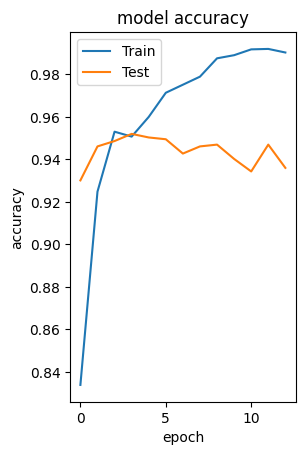

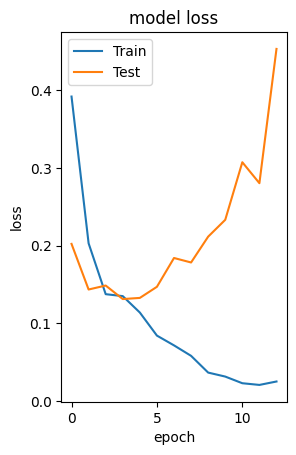

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

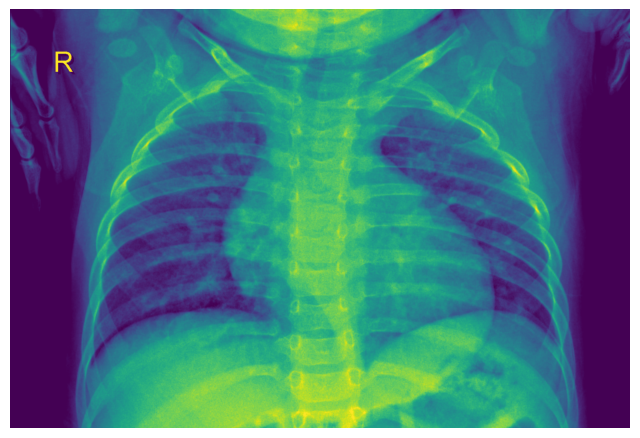

In [ ]:
test_img_path = "/content/drive/MyDrive/chest_xray /test/NORMAL/IM-0236-0001.jpeg"
test_image = Image.open(test_img_path)
test_image = np.array(test_image).astype('float32')/255
test_image = transform.resize(test_image, (img_width, img_height, 3))
test_image = np.expand_dims(test_image, axis=0)



plt.figure(figsize=(8,8))
test_img = mpimg.imread(test_img_path)
plt.imshow(test_img)
plt.axis('off')
plt.show()